### Generate random data and implement batch mini-batch and stochastic gradient decent with linear regression from scratch

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
theta_0=0
theta_1=0
alpha=0.001
m=50
a=-2
b=1
x=np.linspace(0,20)
x=x.reshape(50,1)
y=a*x+b
len(x)

50

In [3]:
def ylabel(theta_0,theta_1,x):
    H=[]
    hyp=np.array(H)
    hyp=theta_0+theta_1*x
    return hyp
#predictions=ylabel(theta_0,theta_1,x)


def cost(hyp,y,m):
    #print("shape of hyp ",np.shape(hyp))
    #print("shape of y ",np.shape(y))
    c=sum(((hyp)-y)**2)
    #print("shape of c",np.shape(y))
    cost=(1/(2*m))*c
    return cost
#cost=cost(predictions,y,m)
#cost

def gradient(hyp,x,y,m):
    grad_0=(1/m)*sum((hyp)-y)
    grad_1=(1/m)*sum(((hyp)-y)*x)
    return grad_0,grad_1

#grad0,grad1=gradient(predictions,y,m)
#print("grad0 is = ",grad0)
#print("grad1 is = ",grad1)

def update(alpha,grad0,grad1):
    global theta_0
    global theta_1
    theta_0=theta_0-(alpha*grad0)
    theta_1=theta_1-(alpha*grad1)
    return theta_0,theta_1

#theta_0,theta_1=update(alpha,grad0,grad1)
#print(theta_0)
#print(theta_1)






#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
epochs=100

def batch_gd(x,y,m,alpha,epochs):
    global theta_0
    global theta_1
    iterations=[]
    errors=[]
    th0=[]
    th1=[]
    
    for i in range(epochs):
        predictions=ylabel(theta_0,theta_1,x)
        cost_val=cost(predictions,y,m)
        errors.append(cost_val)
        grad0,grad1=gradient(predictions,x,y,m)
        theta_0,theta_1=update(alpha,grad0,grad1)
        iterations.append(i)
        th0.append(theta_0)
        th1.append(theta_1)
    return th0,th1,theta_0,theta_1,errors,iterations,predictions
    

th0,th1,theta_0,theta_1,cost,iterations,predictions=batch_gd(x,y,m,alpha,epochs)

print("th0 is =  ",th0)
print("th1 is =  ",th1)
print("cost is =  " , cost)
print("iterations is =  ",iterations)
print("predictions is = ",predictions)



    
    
    
    

th0 is =   [array([-0.019]), array([-0.03538712]), array([-0.04951526]), array([-0.06169037]), array([-0.07217699]), array([-0.0812038]), array([-0.08896853]), array([-0.09564212]), array([-0.10137236]), array([-0.10628704]), array([-0.11049661]), array([-0.11409659]), array([-0.11716955]), array([-0.11978687]), array([-0.12201028]), array([-0.12389313]), array([-0.12548157]), array([-0.12681547]), array([-0.12792933]), array([-0.12885294]), array([-0.1296121]), array([-0.13022908]), array([-0.13072314]), array([-0.13111096]), array([-0.13140692]), array([-0.13162348]), array([-0.1317714]), array([-0.13185998]), array([-0.13189728]), array([-0.13189025]), array([-0.13184491]), array([-0.13176645]), array([-0.13165936]), array([-0.13152755]), array([-0.13137435]), array([-0.13120269]), array([-0.13101507]), array([-0.13081366]), array([-0.13060035]), array([-0.13037674]), array([-0.13014426]), array([-0.1299041]), array([-0.12965732]), array([-0.12940483]), array([-0.1291474]), array([-

#### Calculate r2 score

In [35]:
from sklearn.metrics import r2_score

In [36]:
y_pred = theta_0 + theta_1*x
r2_score(y,y_pred)

0.9976984742382373

#### Plot loss vs. epochs

Text(0, 0.5, 'Costs')

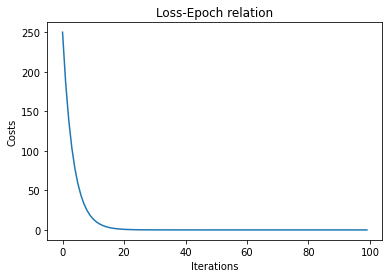

In [37]:
plt.plot(iterations,cost)
plt.title('Loss-Epoch relation')
plt.xlabel('Iterations')
plt.ylabel('Costs')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'Costs')

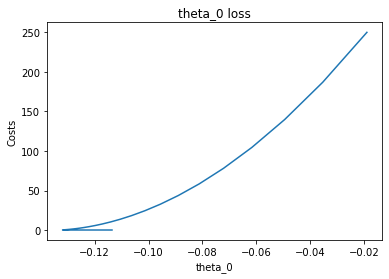

In [38]:
plt.plot(th0,cost)
plt.title('theta_0 loss')
plt.xlabel('theta_0')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

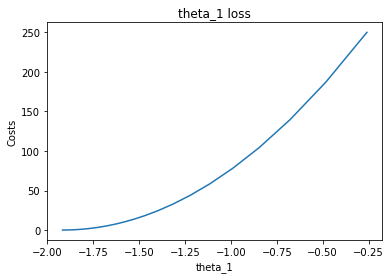

In [39]:
plt.plot(th1,cost)
plt.title('theta_1 loss')
plt.xlabel('theta_1')
plt.ylabel('Costs')

#### Plot all regression lines till converge

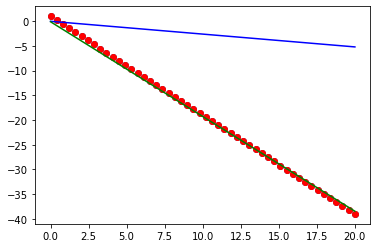

In [40]:
plt.scatter(x,y)
plt.plot(x,th0[0]+th1[0]*x, color="b")

plt.scatter(x,y,color="r")
plt.plot(x,th0[-1]+th1[-1]*x,color="g")


#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations


In [12]:

def mini_batch(X,Y):
    m=len(X)
    alpha=0.001
    epochs=30
    batch_size=10
    theta_0=0
    theta_1=0
    losses=[]
    iterations=[]
    predictions=[]
    thetas_0=[]
    thetas_1=[]
    count=0

    
    for j in range(epochs):
        
        for i in range(0,m,batch_size):
            
            x_batch=X[i:i+batch_size]
            y_batch=Y[i:i+batch_size]
            
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            hyp=theta_0+theta_1*x_batch
            c=sum(((hyp)-y_batch)**2)
            cost=(1/(2*len(x_batch)))*c
            grad_1=(1/batch_size)*sum(theta_0+theta_1*x_batch-y_batch)
            grad_2=(1/batch_size)*sum((theta_0+theta_1*x_batch-y_batch)*x_batch)
            theta_0=theta_0-(alpha*grad_1)
            theta_1=theta_1-(alpha*grad_2)
            losses.append(cost)
            iterations.append(count)
            predictions.append(hyp)
            count+=1
    return losses,iterations,predictions,thetas_0,thetas_1

losses,iterations,predictions,thetas_0,thetas_1=mini_batch(x,y)



            
            


        
        

[array([6.32257393]), array([60.92619486]), array([168.9711267]), array([277.72980883]), array([301.78398019]), array([0.86821451]), array([11.15939542]), array([34.29029597]), array([59.03604843]), array([66.1616244]), array([0.18642605]), array([1.67894946]), array([6.64153278]), array([12.67328144]), array([15.15168327]), array([0.25671996]), array([0.14347945]), array([1.15325506]), array([2.77970783]), array([3.78381241]), array([0.36910279]), array([0.03184022]), array([0.15218995]), array([0.63895009]), array([1.10536232]), array([0.43696471]), array([0.10527324]), array([0.01257178]), array([0.16235776]), array([0.4112911]), array([0.47096106]), array([0.16495795]), array([0.01582317]), array([0.05027215]), array([0.20552451]), array([0.48659508]), array([0.19755287]), array([0.03143642]), array([0.02130746]), array([0.13478926]), array([0.49321356]), array([0.21334548]), array([0.04151465]), array([0.0127457]), array([0.10723621]), array([0.49557402]), array([0.22051097]), arr

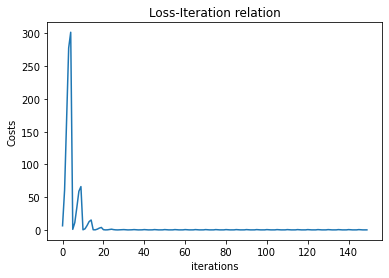

In [13]:
plt.plot(iterations,losses)
plt.title('Loss-Iteration relation')
plt.xlabel('iterations')
plt.ylabel('Costs')
print(losses)

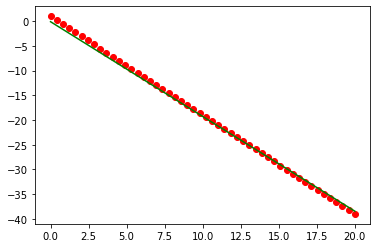

In [14]:
plt.scatter(x,y,color="r")
plt.plot(x,thetas_0[-1]+thetas_1[-1]*x,color="g")

Text(0, 0.5, 'Costs')

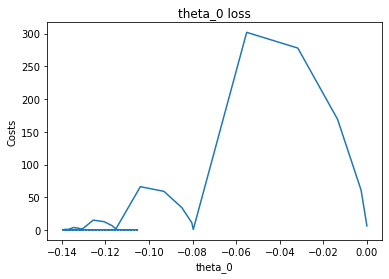

In [17]:
plt.plot(thetas_0,losses)
plt.title('theta_0 loss')
plt.xlabel('theta_0')
plt.ylabel('Costs')

In [18]:
thetas_1

[0,
 array([-0.00765931]),
 array([-0.07424931]),
 array([-0.25933656]),
 array([-0.59236116]),
 array([-1.03951621]),
 array([-1.04209349]),
 array([-1.07056862]),
 array([-1.15393948]),
 array([-1.30747591]),
 array([-1.51684208]),
 array([-1.51708729]),
 array([-1.52806559]),
 array([-1.56473776]),
 array([-1.6358654]),
 array([-1.73605081]),
 array([-1.73522654]),
 array([-1.73817431]),
 array([-1.75340793]),
 array([-1.7866986]),
 array([-1.8367508]),
 array([-1.83543672]),
 array([-1.8347002]),
 array([-1.8400929]),
 array([-1.85601074]),
 array([-1.88304009]),
 array([-1.88150235]),
 array([-1.87907701]),
 array([-1.87995357]),
 array([-1.88789424]),
 array([-1.90434785]),
 array([-1.90270866]),
 array([-1.89951067]),
 array([-1.89831585]),
 array([-1.90259314]),
 array([-1.91418584]),
 array([-1.91250129]),
 array([-1.90895129]),
 array([-1.90680753]),
 array([-1.90940204]),
 array([-1.91875767]),
 array([-1.91705351]),
 array([-1.91334462]),
 array([-1.91076727]),
 array([-1.9

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [4]:
theta_0=0
theta_1=0
m=1
epochs=30
alpha=0.0001 

def SGD(x,y,m,alpha,epochs):
    global theta_0
    global theta_1
    iterations=[]
    errors=[]
    th0=[]
    th1=[]
    predictions=[]
    count=0
    
    for j in range(epochs):
        for i in range(len(x)):
            predictions.append(ylabel(theta_0,theta_1,x[i]))
            errors.append(cost(predictions[-1],y[i],m))
            grad0,grad1=gradient(predictions[-1],x[i],y[i],m)
            theta_0,theta_1=update(alpha,grad0,grad1)
            iterations.append(count)
            th0.append(theta_0)
            th1.append(theta_1)
            count+=1
            
    return th0,th1,theta_0,theta_1,errors,iterations,predictions

th0,th1,theta_0,theta_1,cost,iterations,predictions=SGD(x,y,m,alpha,epochs)
    

(50, 1)


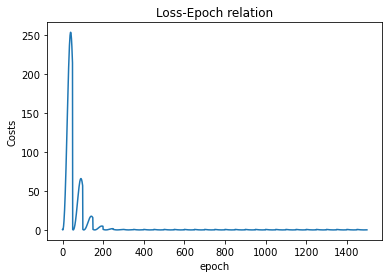

In [5]:

plt.plot(iterations,cost)
plt.title('Loss-Epoch relation')
plt.xlabel('iterations')
plt.ylabel('Costs')
print(x.shape)

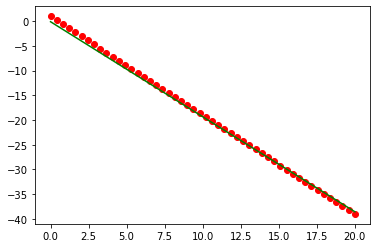

In [6]:
plt.scatter(x,y,color="r")
plt.plot(x,th0[-1]+th1[-1]*x,color="g")

Text(0, 0.5, 'Costs')

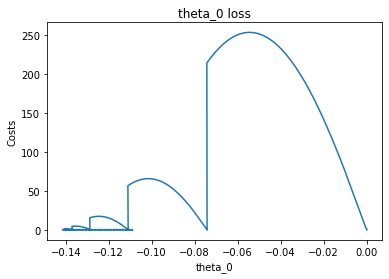

In [7]:
plt.plot(th0,cost)
plt.title('theta_0 loss')
plt.xlabel('theta_0')
plt.ylabel('Costs')